In [42]:
# WorldCup 2k19 Analysis

In [70]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

from __future__ import division

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import statsmodels.api as sm

In [44]:
Matches = pd.read_csv('E:\Data Analytics\MyAnalytics\WorldCup2k19\MatchResults.csv')
Matches.head()

,Winner,Result,Margin,BR,Unnamed: 4,Match,Ground,Start Date
0,NaN,n/r,-,NaN,NaN,Pakistan v Zimbabwe,Lahore,31-May-15
1,England,won,210 runs,NaN,NaN,England v New Zealand,Birmingham,09-Jun-15
2,New Zealand,won,13 runs,NaN,NaN,England v New Zealand,The Oval,12-Jun-15
3,New Zealand,won,3 wickets,6,NaN,England v New Zealand,Southampton,14-Jun-15
4,England,won,7 wickets,36,NaN,England v New Zealand,Nottingham,17-Jun-15


In [45]:
Matches = Matches[Matches['Result'] != 'n/r']

In [46]:
Matches = Matches.drop('Unnamed: 4',axis = 1)
Matches = Matches.drop('BR',axis = 1)
Matches.head()

,Winner,Result,Margin,Match,Ground,Start Date
1,England,won,210 runs,England v New Zealand,Birmingham,09-Jun-15
2,New Zealand,won,13 runs,England v New Zealand,The Oval,12-Jun-15
3,New Zealand,won,3 wickets,England v New Zealand,Southampton,14-Jun-15
4,England,won,7 wickets,England v New Zealand,Nottingham,17-Jun-15
5,Bangladesh,won,79 runs,Bangladesh v India,Dhaka,18-Jun-15


In [47]:
Matches = Matches.dropna()
Matches = Matches[Matches['Match'] != 'Match']
Matches.tail()

,Winner,Result,Margin,Match,Ground,Start Date
435,England,won,3 wickets,England v Pakistan,Nottingham,17-May-19
437,Ireland,won,72 runs,Ireland v Afghanistan,Belfast,19-May-19
438,England,won,54 runs,England v Pakistan,Leeds,19-May-19
439,Afghanistan,won,126 runs,Ireland v Afghanistan,Belfast,21-May-19
440,Sri Lanka,won,35 runs,Scotland v Sri Lanka,Edinburgh,21-May-19


In [48]:
teams = []
for index,row in Matches.iterrows():
    teams.append(row['Match'].split('v'))

In [49]:
Team_1 = []
Team_2 = []
count = 0
for team in teams:
    Team_1.append(team[0].strip())
    Team_2.append(team[1].strip())

Matches['Team 1'] = Team_1
Matches['Team 2'] = Team_2

Matches.head()

,Winner,Result,Margin,Match,Ground,Start Date,Team 1,Team 2
1,England,won,210 runs,England v New Zealand,Birmingham,09-Jun-15,England,New Zealand
2,New Zealand,won,13 runs,England v New Zealand,The Oval,12-Jun-15,England,New Zealand
3,New Zealand,won,3 wickets,England v New Zealand,Southampton,14-Jun-15,England,New Zealand
4,England,won,7 wickets,England v New Zealand,Nottingham,17-Jun-15,England,New Zealand
5,Bangladesh,won,79 runs,Bangladesh v India,Dhaka,18-Jun-15,Bangladesh,India


In [50]:
Matches['Match'].count()

410

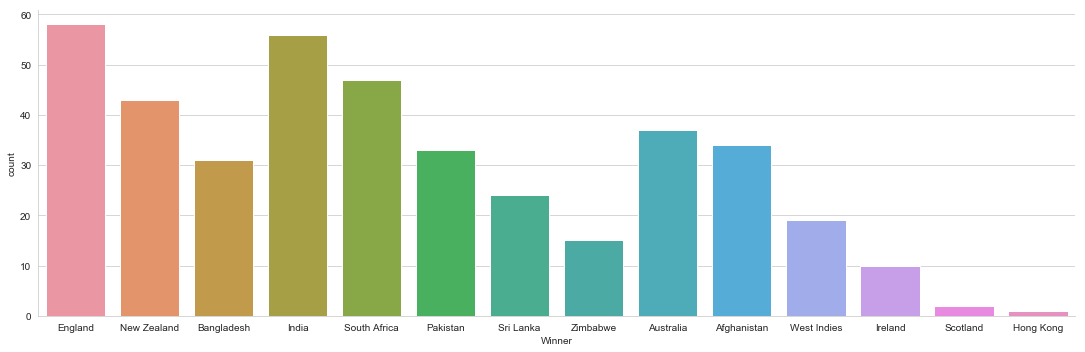

In [51]:
sns.catplot('Winner',data = Matches,kind = 'count',height = 5,aspect = 3)

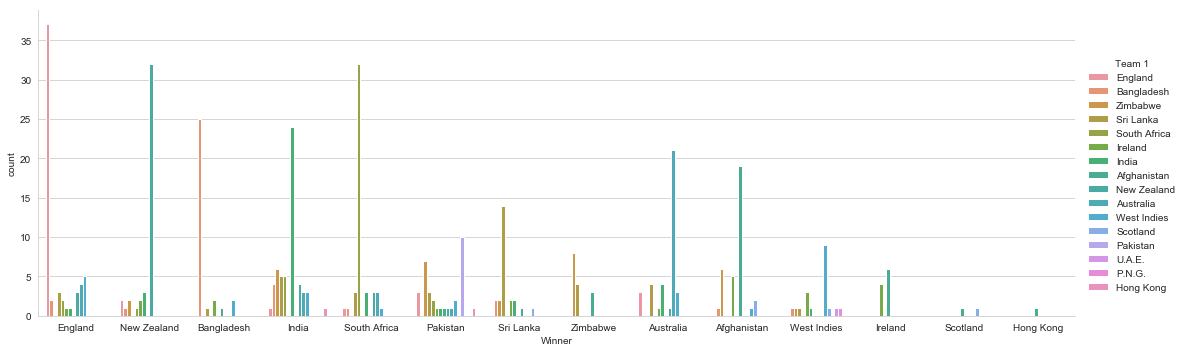

In [52]:
sns.catplot('Winner',data = Matches,hue = 'Team 1',kind = 'count',height = 5,aspect = 3)

In [53]:
TeamsInWorldCup = ['Afghanistan','Australia','Bangladesh','England','India','New Zealand','Pakistan','Sri Lanka','South Africa','West Indies']

WorldCupTeamsMat = pd.DataFrame()

for index,row in Matches.iterrows():
    if((row['Team 1'] in TeamsInWorldCup) and (row['Team 2'] in TeamsInWorldCup)):        
        WorldCupTeamsMat = WorldCupTeamsMat.append(row)
        
WorldCupTeamsMat.head()    

,Ground,Margin,Match,Result,Start Date,Team 1,Team 2,Winner
1,Birmingham,210 runs,England v New Zealand,won,09-Jun-15,England,New Zealand,England
2,The Oval,13 runs,England v New Zealand,won,12-Jun-15,England,New Zealand,New Zealand
3,Southampton,3 wickets,England v New Zealand,won,14-Jun-15,England,New Zealand,New Zealand
4,Nottingham,7 wickets,England v New Zealand,won,17-Jun-15,England,New Zealand,England
5,Dhaka,79 runs,Bangladesh v India,won,18-Jun-15,Bangladesh,India,Bangladesh


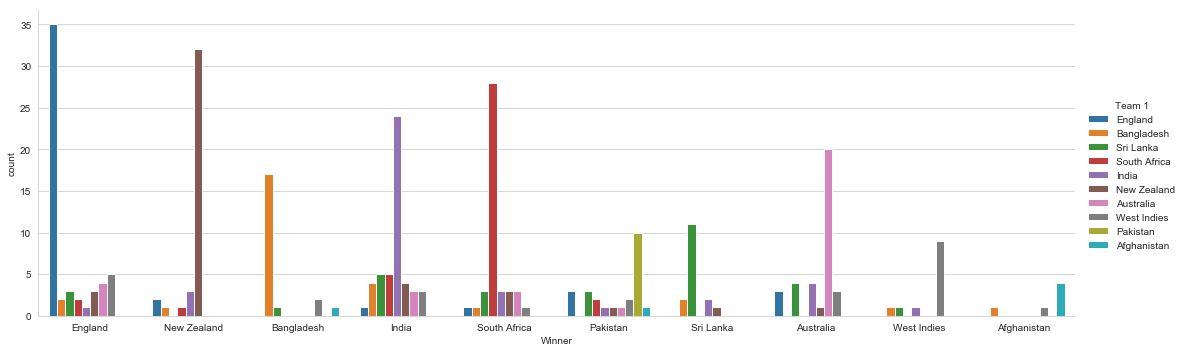

In [54]:
sns.catplot('Winner',data = WorldCupTeamsMat,hue = 'Team 1',kind = 'count',height = 5,aspect = 3)

In [55]:
print((WorldCupTeamsMat.Winner == 'England').sum())

55


In [56]:
WorldCupTeamsMat.head()

,Ground,Margin,Match,Result,Start Date,Team 1,Team 2,Winner
1,Birmingham,210 runs,England v New Zealand,won,09-Jun-15,England,New Zealand,England
2,The Oval,13 runs,England v New Zealand,won,12-Jun-15,England,New Zealand,New Zealand
3,Southampton,3 wickets,England v New Zealand,won,14-Jun-15,England,New Zealand,New Zealand
4,Nottingham,7 wickets,England v New Zealand,won,17-Jun-15,England,New Zealand,England
5,Dhaka,79 runs,Bangladesh v India,won,18-Jun-15,Bangladesh,India,Bangladesh


In [57]:
WorldCupTeamsMat = WorldCupTeamsMat.drop('Start Date',axis = 1)

In [58]:
match_count = {}
total_wins = {}

for team in TeamsInWorldCup:
    total_Matches = (WorldCupTeamsMat['Team 1'] == team).sum()
    total_Matches += (WorldCupTeamsMat['Team 2'] == team).sum()
    total_Wins = (WorldCupTeamsMat['Winner'] == team).sum()
    match_count[team] = total_Matches
    total_wins[team] = total_Wins

print('Total Matches: %s' %match_count)
print('Total Wins %s' %total_wins)

Total Matches: {'Afghanistan': 11, 'Australia': 71, 'England': 77, 'Bangladesh': 46, 'Pakistan': 62, 'South Africa': 69, 'India': 76, 'West Indies': 53, 'Sri Lanka': 67, 'New Zealand': 68}
Total Wins {'Afghanistan': 6, 'Australia': 35, 'England': 55, 'Bangladesh': 21, 'Pakistan': 24, 'South Africa': 43, 'India': 49, 'West Indies': 12, 'Sri Lanka': 16, 'New Zealand': 39}


In [59]:
teamStats = pd.DataFrame(match_count.items(),columns = ['Team','Total Matches'])
teamStats.head()

,Team,Total Matches
0,Afghanistan,11
1,Australia,71
2,England,77
3,Bangladesh,46
4,Pakistan,62


In [60]:
teamStats['Total Wins'] = teamStats['Team'].map(total_wins)
teamStats.head()

,Team,Total Matches,Total Wins
0,Afghanistan,11,6
1,Australia,71,35
2,England,77,55
3,Bangladesh,46,21
4,Pakistan,62,24


In [61]:
teamStats['Loss'] = teamStats['Total Matches'] - teamStats['Total Wins']
teamStats['Win %'] = teamStats['Total Wins']/teamStats['Total Matches']
teamStats.head()

,Team,Total Matches,Total Wins,Loss,Win %
0,Afghanistan,11,6,5,0.545455
1,Australia,71,35,36,0.492958
2,England,77,55,22,0.714286
3,Bangladesh,46,21,25,0.456522
4,Pakistan,62,24,38,0.387097


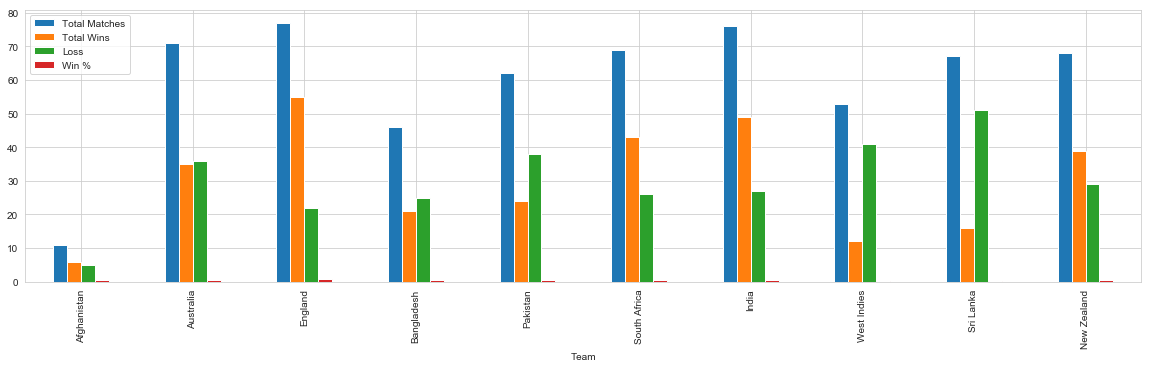

In [62]:
teamStats.plot.bar(x = 'Team',figsize = (20,5))

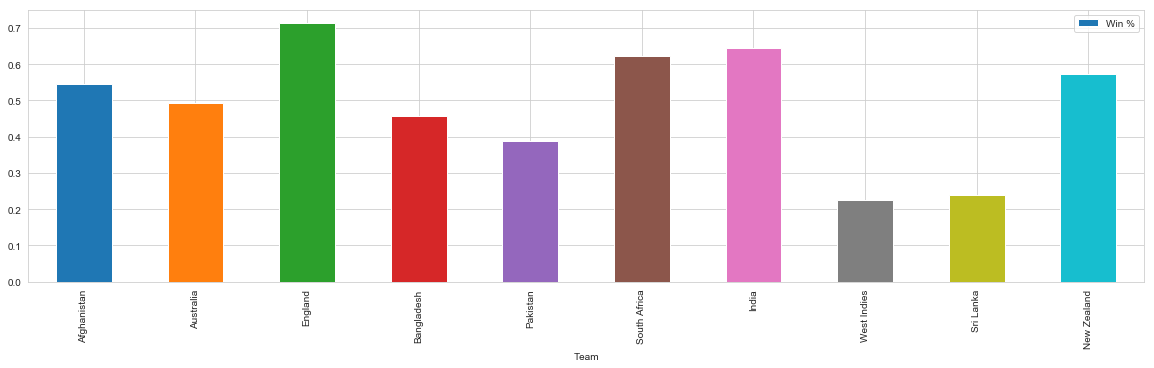

In [63]:
teamStats.plot.bar(x = 'Team',y = 'Win %',figsize = (20,5))

In [64]:
home_Matches = {}
home_Wins = {}

for team in TeamsInWorldCup:
    home_matches = (WorldCupTeamsMat['Team 1'] == team).sum()
    home_wins = ((WorldCupTeamsMat['Team 1'] == team) & (WorldCupTeamsMat['Winner'] == team)).sum()
    home_Matches[team] = home_matches
    home_Wins[team] = home_wins

In [65]:
teamStats['Home Matches'] = teamStats['Team'].map(home_Matches)
teamStats['Home Wins'] = teamStats['Team'].map(home_Wins)

teamStats.head()

,Team,Total Matches,Total Wins,Loss,Win %,Home Matches,Home Wins
0,Afghanistan,11,6,5,0.545455,6,4
1,Australia,71,35,36,0.492958,31,20
2,England,77,55,22,0.714286,45,35
3,Bangladesh,46,21,25,0.456522,29,17
4,Pakistan,62,24,38,0.387097,10,10


In [66]:
teamStats['Win % Home'] = teamStats['Home Wins']/teamStats['Home Matches']
teamStats.head()

,Team,Total Matches,Total Wins,Loss,Win %,Home Matches,Home Wins,Win % Home
0,Afghanistan,11,6,5,0.545455,6,4,0.666667
1,Australia,71,35,36,0.492958,31,20,0.645161
2,England,77,55,22,0.714286,45,35,0.777778
3,Bangladesh,46,21,25,0.456522,29,17,0.586207
4,Pakistan,62,24,38,0.387097,10,10,1.000000


In [67]:
away_Matches = {}
away_Wins = {}

for team in TeamsInWorldCup:
    away_matches = (WorldCupTeamsMat['Team 2'] == team).sum()
    away_wins = ((WorldCupTeamsMat['Team 2'] == team) & (WorldCupTeamsMat['Winner'] == team)).sum()
    away_Matches[team] = away_matches
    away_Wins[team] = away_wins
    
teamStats['Away Matches'] = teamStats['Team'].map(away_Matches)
teamStats['Away Wins'] = teamStats['Team'].map(away_Wins)
teamStats['Win% Away'] = teamStats['Away Wins']/teamStats['Away Matches']

teamStats

,Team,Total Matches,Total Wins,Loss,Win %,Home Matches,Home Wins,Win % Home,Away Matches,Away Wins,Win% Away
0,Afghanistan,11,6,5,0.545455,6,4,0.666667,5,2,0.400000
1,Australia,71,35,36,0.492958,31,20,0.645161,40,15,0.375000
2,England,77,55,22,0.714286,45,35,0.777778,32,20,0.625000
3,Bangladesh,46,21,25,0.456522,29,17,0.586207,17,4,0.235294
4,Pakistan,62,24,38,0.387097,10,10,1.000000,52,14,0.269231
5,South Africa,69,43,26,0.623188,38,28,0.736842,31,15,0.483871
6,India,76,49,27,0.644737,39,24,0.615385,37,25,0.675676
7,West Indies,53,12,41,0.226415,26,9,0.346154,27,3,0.111111
8,Sri Lanka,67,16,51,0.238806,31,11,0.354839,36,5,0.138889
9,New Zealand,68,39,29,0.573529,45,32,0.711111,23,7,0.304348


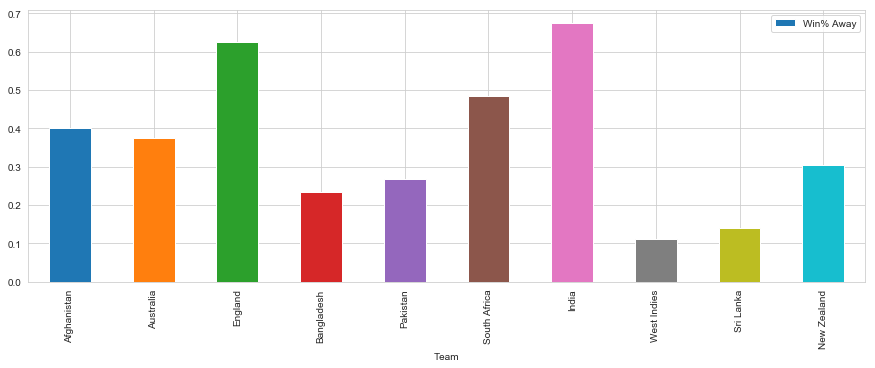

In [68]:
teamStats.plot.bar(x = 'Team',y = 'Win% Away',figsize = (15,5))